In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
crime_data=pd.read_csv("crime_data.csv")

In [76]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


##  Standardization of Data :

In [77]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
crime_data_scaled= scaler.fit_transform(crime_data.iloc[:,1:])

In [79]:
crime_data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## 1. K-Means :

In [80]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(crime_data_scaled)

KMeans(n_clusters=3, random_state=0)

In [81]:
kmeans.inertia_

80.08886132199619

In [82]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(n_clusters=3, random_state=0)>

###    The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

##        So we need to  find optimum number of  cluster:

###  CLUSTER VALIDATION TECHNIQUES:

###     1. Elbow Method
###     2. Silhouette score
###     3.Calinski harabasz score:

##   1.  Elbow Method:

In [83]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_data_scaled)
    wcss.append(kmeans.inertia_)

In [84]:
wcss

[200.0,
 104.96163315756873,
 80.08886132199619,
 57.55425863091106,
 50.520265525350695,
 43.92746404497574,
 40.52183461131975,
 34.687388397849084,
 32.70648136388185,
 28.311639397122555]

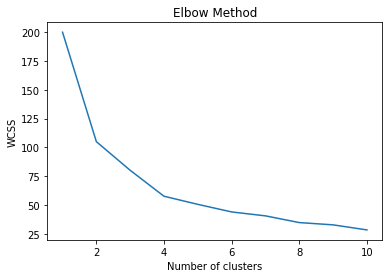

In [85]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### From the plot:

###  we can choose  n_clusters== 3 (optimum number)

## 2.   Silhouette (clustering):

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [87]:
X=crime_data_scaled

In [88]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.3133544326927289
For n_clusters = 6 The average silhouette_score is : 0.29675212802432493


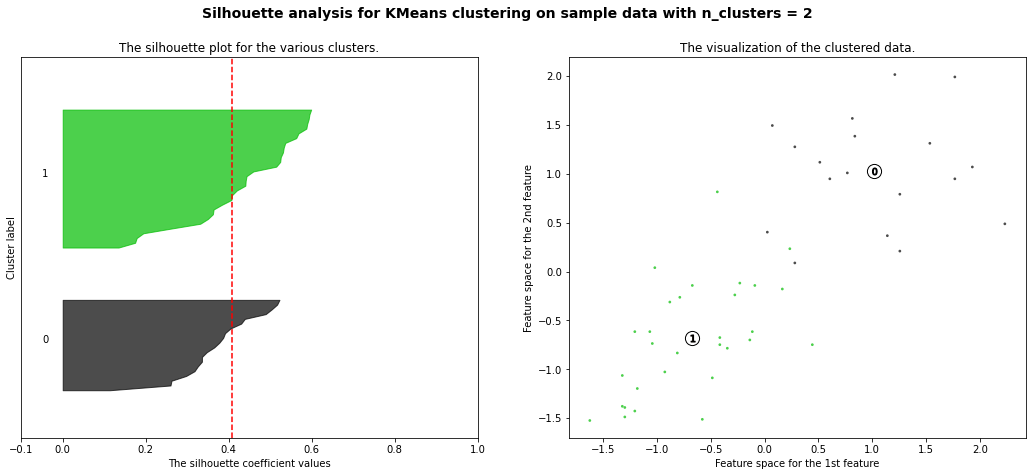

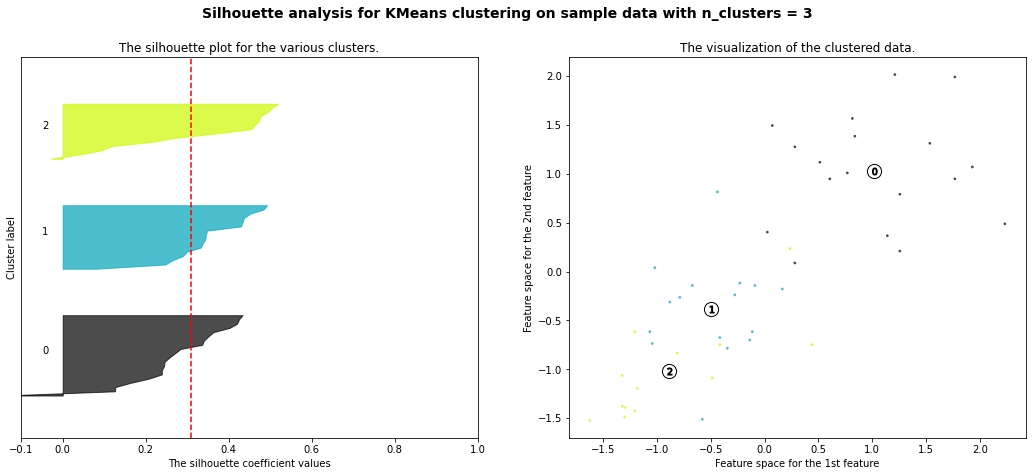

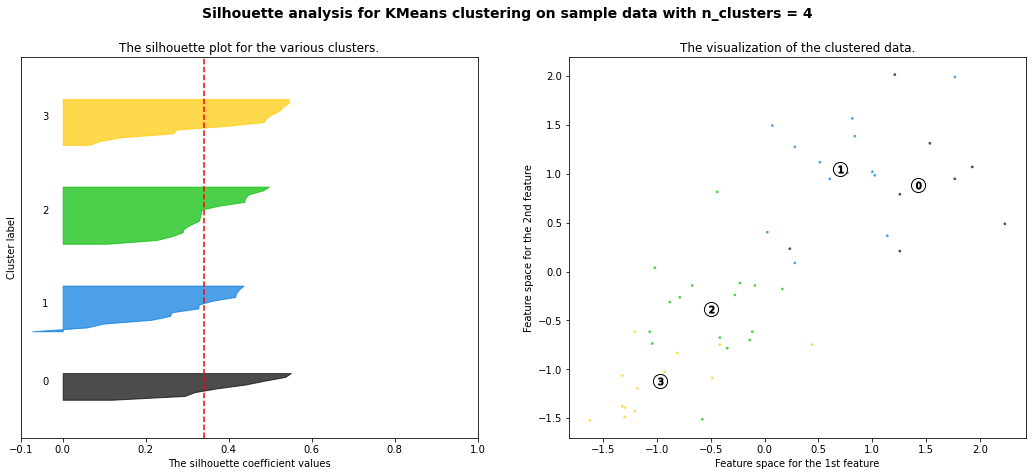

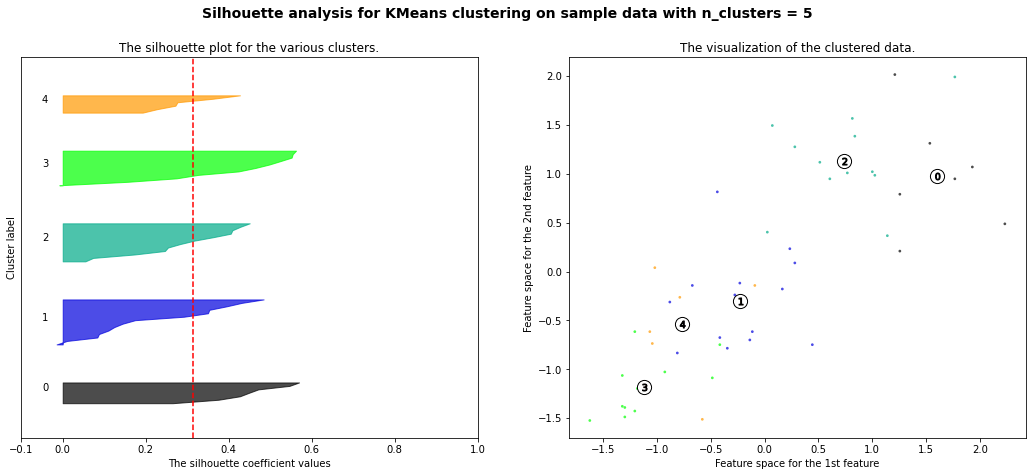

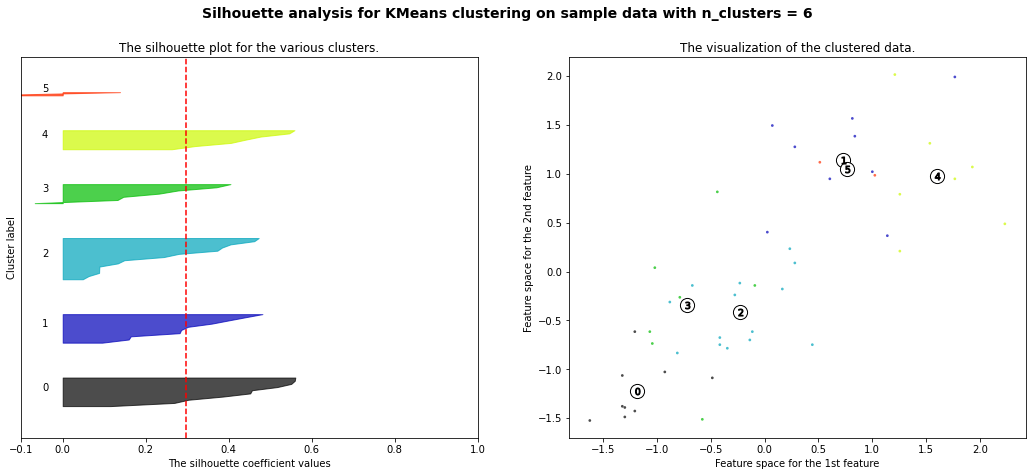

In [89]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

###  Observation :

### This Silhouette (clustering)  gives n_cluster  ==  2

####    n_clusters=2

##  3.Calinski harabasz score:

In [90]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [91]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
labels_1 = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels_1)

43.46199150301377

In [92]:
kmeans_model_1 = KMeans(n_clusters=3, random_state=1).fit(X)
labels_2 = kmeans_model_1.labels_
metrics.calinski_harabasz_score(X, labels_2)

35.18713488296232

In [93]:
kmeans_model_2 = KMeans(n_clusters=4, random_state=1).fit(X)
labels_3 = kmeans_model_2.labels_
metrics.calinski_harabasz_score(X, labels_3)

37.94972059900646

In [94]:
val= []
for i in range(2, 11):
    kmeans_model_2 = KMeans(n_clusters=i, random_state=0).fit(X)
    labels_3 = kmeans_model_2.labels_
    score=metrics.calinski_harabasz_score(X,labels_3)
    val.append(score)

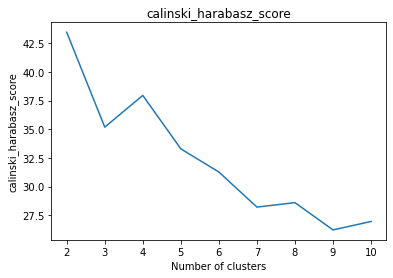

In [95]:
plt.plot(range(2, 11), val)
plt.title('calinski_harabasz_score')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

### Observation:

#### higher the calinski_harabasz score the better the model

####  this gives n_cluster ==2

## optimum number of  cluster: 

###  Elbow method gives n_cluster ==3
### Silhouette score method gives  n_cluster ==2

###  calinski_harabasz score  gives  n_cluster ==2

###   Conclusion:

###   Lets  build the model with   n_cluster ==   2  

## Building the Model ( Cluster) :

In [96]:
clusters_new = KMeans(2, random_state=None)
clusters_new.fit(crime_data_scaled)

KMeans(n_clusters=2)

###  Cluster labels:

In [97]:
clusters_new.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [98]:
crime_data['clusterid'] = clusters_new.labels_

###  Data frame with cluster_id

In [99]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


###  Cluster centers:

In [100]:
clusters_new.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.67675778, -0.68274685, -0.13306084, -0.57037591]])

### BarPlot:

<Figure size 1152x720 with 0 Axes>

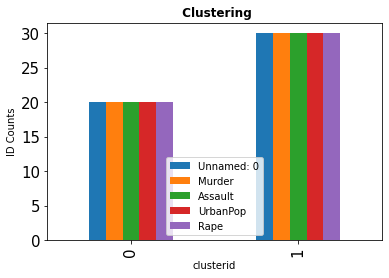

In [101]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
crime_data.groupby(['clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title(' Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Grouping by cluster no

In [102]:
crime_data.groupby(['clusterid']).count()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
clusterid,,,,,
0,20,20,20,20,20
1,30,30,30,30,30


### Visualisation:

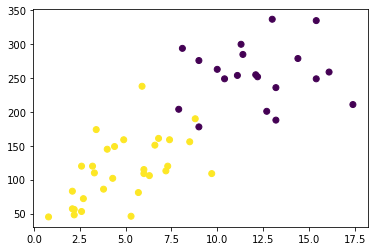

In [103]:
plt.scatter(crime_data["Murder"],crime_data["Assault"], c=clusters_new.labels_,cmap='viridis')

##  Grouping of the data (cluster_id)

In [104]:
crime_data[crime_data['clusterid']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [105]:
crime_data[crime_data['clusterid']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1


### Finding the mean values of various features:

In [106]:
crime_data.groupby('clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


###   Inferences:

####  We have two clusters  -->  cluster0  and cluster1

####   Between them  cluster 0 have high avg crime level  

##  2. Hierarchical Clustering:

In [107]:
crime_data_1=pd.read_csv("crime_data.csv")

In [108]:
crime_data_1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [109]:
crime_data_2=crime_data_1.copy()

###  Normalization of Data:

####  Normalizing function:

In [110]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [111]:
df_norm = norm_func(crime_data_2.iloc[:,1:])

In [112]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


##  Dendrogram:

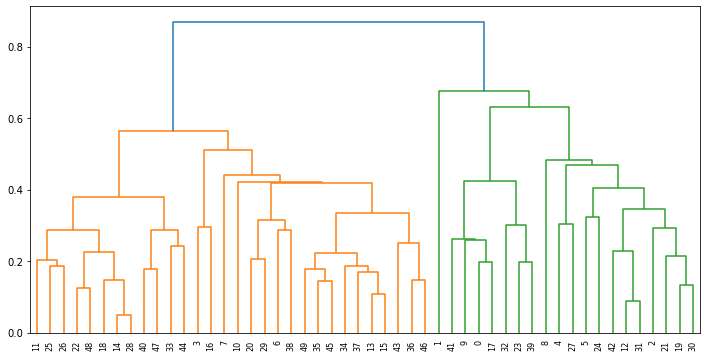

In [113]:
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'),color_threshold=0.7)

###  Building the Cluster:

In [114]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'average')

###  Fitting the Data

In [115]:
y_hc = hc.fit_predict(df_norm)

In [116]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [117]:
crime_data_2['h_clusterid'] = Clusters

In [118]:
crime_data_2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


###  Barplot:

<Figure size 1152x720 with 0 Axes>

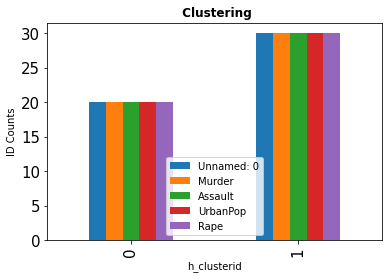

In [119]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
crime_data_2.groupby(['h_clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title(' Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Grouping by cluster no

In [120]:
crime_data_2.groupby(['h_clusterid']).count()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,,
0,20,20,20,20,20
1,30,30,30,30,30


In [121]:
crime_data_2.groupby('h_clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_clusterid,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


### Visualisation:

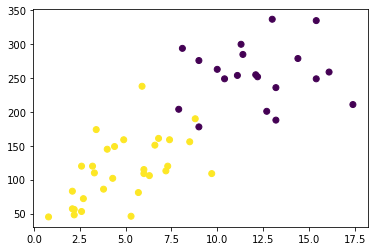

In [122]:
plt.scatter(crime_data_2["Murder"],crime_data_2["Assault"], c=hc.labels_,cmap='viridis')

###  Inferences:

#### we have 2cluster

####  Among them cluster 0  have high avg values for rape and assault 

#### cluster 0 have high avg value of murder and also have high  mean urban population

## 3.  DBSCAN Clustering:

In [123]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


###  Model Building|| Model Training

#### eps=0.3,min_samples=10,metric='euclidean'

In [124]:
dbscan=DBSCAN(eps=0.3,min_samples=10,metric='euclidean')

In [125]:
dbscan.fit(df_norm)

DBSCAN(eps=0.3, min_samples=10)

In [126]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0],
      dtype=int64)

In [127]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [128]:
crime_data_3=pd.read_csv("crime_data.csv")

In [129]:
crime_data_3["cluster"]=cl

In [130]:
crime_data_3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1


### Barplot:

<Figure size 1152x720 with 0 Axes>

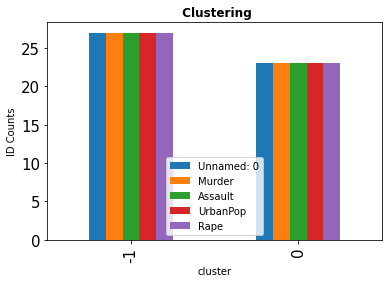

In [131]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
crime_data_3.groupby(['cluster']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title(' Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Grouping with cluster no

In [132]:
crime_data_3.groupby(['cluster']).count()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
cluster,,,,,
-1,27,27,27,27,27
0,23,23,23,23,23


###  Finding the mean values of various features:

In [133]:
crime_data_3.groupby('cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
-1,9.759259,212.148148,64.851852,23.992593
0,5.473913,122.173913,66.347826,17.991304


### Visualisation:

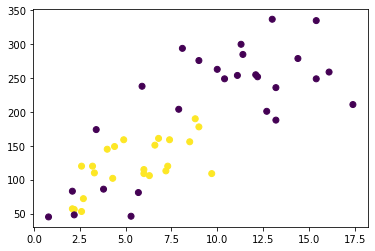

In [134]:
plt.scatter(crime_data_3["Murder"],crime_data_3["Assault"], c=dbscan.labels_,cmap='viridis')

####  eps=0.4,min_samples=10,metric='euclidean'

In [135]:
dbscan_1=DBSCAN(eps=0.4,min_samples=10,metric='euclidean')

In [136]:
dbscan_1.fit(df_norm)

DBSCAN(eps=0.4, min_samples=10)

In [137]:
dbscan_1.labels_

array([-1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [138]:
cl_1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [139]:
crime_data_4=pd.read_csv("crime_data.csv")

In [140]:
crime_data_4["cluster"]=cl_1

### Barplot:

<Figure size 1152x720 with 0 Axes>

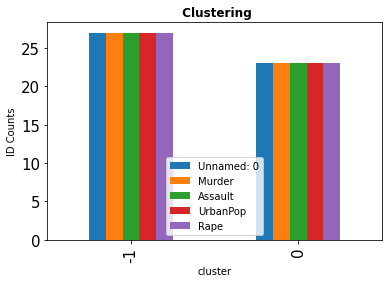

In [141]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
crime_data_4.groupby(['cluster']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title(' Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

###  Grouping by cluster no

In [142]:
crime_data_4.groupby(['cluster']).count()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
cluster,,,,,
-1,27,27,27,27,27
0,23,23,23,23,23


###  Visualisation

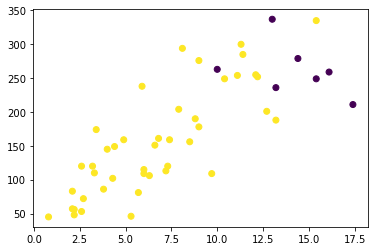

In [143]:
plt.scatter(crime_data_4["Murder"],crime_data_4["Assault"], c=dbscan_1.labels_,cmap='viridis')

###   Finding the mean values of various features:

In [144]:
crime_data_4.groupby('cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
-1,9.759259,212.148148,64.851852,23.992593
0,5.473913,122.173913,66.347826,17.991304


### inferences:

#### cluster -1 for outliers 

#### so here we have 1 cluster-->> cluster 0 and we  have calculated  the respective  avg values 

####  outliers have high avg values for the crime levels